## Obtener información desde un API Externa


* Las librerías se pueden llamar directamente con la librería requests
* Usar el comando GET para obtener la información desde la API
* Otros comandos son: POST (añade data al API), DELETE permite eliminar data de la API, PUT para hacer actualizaciones de información
* Códigos de retorno:
    * 200: OK. It means  we have a heatlhy connection with the API on web
    * 204: It depicts that we can successfully made a connection to the API, but did not return any data from the service.
    * 401: Authentication failed!
    * 403: Acces is forbidden by the API service.
    * 404: The requested API service is not found on the server/web
    * 500: Internal server error has occurred.

In [1]:
import requests

response_API = requests.get("https://ebac.mx")
response_API.status_code

200

In [2]:
# otro ejemplo
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


In [3]:
# para ver el contenido del JSON
print(response.json())

{'message': 'success', 'number': 10, 'people': [{'craft': 'ISS', 'name': 'Sergey Prokopyev'}, {'craft': 'ISS', 'name': 'Dmitry Petelin'}, {'craft': 'ISS', 'name': 'Frank Rubio'}, {'craft': 'Shenzhou 15', 'name': 'Fei Junlong'}, {'craft': 'Shenzhou 15', 'name': 'Deng Qingming'}, {'craft': 'Shenzhou 15', 'name': 'Zhang Lu'}, {'craft': 'ISS', 'name': 'Stephen Bowen'}, {'craft': 'ISS', 'name': 'Warren Hoburg'}, {'craft': 'ISS', 'name': 'Sultan Alneyadi'}, {'craft': 'ISS', 'name': 'Andrey Fedyaev'}]}


In [4]:
from pprint import pprint
pprint(response.json())

{'message': 'success',
 'number': 10,
 'people': [{'craft': 'ISS', 'name': 'Sergey Prokopyev'},
            {'craft': 'ISS', 'name': 'Dmitry Petelin'},
            {'craft': 'ISS', 'name': 'Frank Rubio'},
            {'craft': 'Shenzhou 15', 'name': 'Fei Junlong'},
            {'craft': 'Shenzhou 15', 'name': 'Deng Qingming'},
            {'craft': 'Shenzhou 15', 'name': 'Zhang Lu'},
            {'craft': 'ISS', 'name': 'Stephen Bowen'},
            {'craft': 'ISS', 'name': 'Warren Hoburg'},
            {'craft': 'ISS', 'name': 'Sultan Alneyadi'},
            {'craft': 'ISS', 'name': 'Andrey Fedyaev'}]}


In [5]:
# otro ejemplo
response = requests.get("http://api.open-notify.org/iss-now.json")
print(response.status_code)
pprint(response.json())

200
{'iss_position': {'latitude': '-34.3220', 'longitude': '-16.6015'},
 'message': 'success',
 'timestamp': 1680484567}


In [6]:
print(response.json()['iss_position'])

{'latitude': '-34.3220', 'longitude': '-16.6015'}


In [7]:
print(response.json()["iss_position"]["latitude"])

-34.3220


In [8]:
lati_str = response.json()["iss_position"]["latitude"]
long_str = response.json()["iss_position"]["longitude"]

In [9]:
type(lati_str)

str

In [10]:
lati = float (lati_str)
long = float(long_str)

print (lati)
print(long)

-34.322
-16.6015


<function matplotlib.pyplot.show(close=None, block=None)>

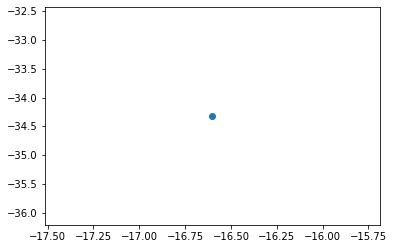

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x=long, y=lati)
plt.show

In [12]:
# Generalmente las respuestas de una llamada API son archivos JSON
# Recordar la clase anterio, cuando se vieron varios ejercicios de cómo utilizarlo de la mejor manera
import json
# se genera una función simple llamada "jprint"
def jprint(obj):
    #create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys = True, indent=4)
    print(text)
jprint(response.json())

{
    "iss_position": {
        "latitude": "-34.3220",
        "longitude": "-16.6015"
    },
    "message": "success",
    "timestamp": 1680484567
}


In [13]:
# Envío de parámetros a las funciones
# En esta función en particular se pasa la latitud y longitus, y la API indica cuántas veces la estación especial ha pasado por ahí.
# Aquí el ejemplo, usando la longitud y latitud de Ciudad de México : 19.4326° N, 99.1332°W

parameters ={
    "lat" : 19.43,
    "lon" : -99.13
}

response = requests.get("http://api.open-notify.org/iss-pass.json", params = parameters)
jprint(response.json())

JSONDecodeError: [Errno Expecting value] <html>
<head><title>404 Not Found</title></head>
<body bgcolor="white">
<center><h1>404 Not Found</h1></center>
<hr><center>nginx/1.10.3</center>
</body>
</html>
: 0

## Wrap up


* En esta sesión se revisó cómo hacer scraping de datos utilizando las librerías requests y luego formatear los resultados con BeatifulSoup.
* Se hicieron algunos ejemplos de cómo traer información de sitios web y parsearlos para generar estructuras limpias y fáciles de utilizar.
* Se enseñó a encontrar los indicadores de elemento de cada sitio web que permitirán generar de manera muy fácil estas estructuras
* Finalmente se utilizó una librería tipo API junto con sus comandos POST, GET, etc. y obtener la información de formato JSON, para luego parsearlo en una estructura más limpia como un diccionario o una lista.